CÓDIGO PARA DIBUJAR EL DIAGRAMA DE INTERACCIÓN DE COLUMNAS RECTANGULARES
PONTIFICIA UNIVERSIDAD CATOLICA DEL ECUADOR
Derechos: Nicolas Fernando Játiva Palma
INGRESO DE DATOS
Calculo de valores de Pn & Mn
Valores de Pn son:  [-78.44770484 -71.51170484 -52.54441029 -35.48563327 -22.47596706
 -11.49085626  -1.66263425   7.44253225  16.06566175  26.51944128
  39.13741029  50.80838447  61.32339315  71.02611439  80.35993947
  89.39403642  98.82256032 111.74536778 124.03798498 135.79494046
 147.09275732 157.99404537 168.55052577 178.80529947 188.79457127
 198.54897601 208.09461003 217.45384162 226.64595379 235.68765848
 244.59351126 253.37624824 262.04706176 270.61582743 279.0912922
 287.48123116 295.79257882 304.03153976 312.20368219 320.3140175
 328.36706816 336.36692593 344.31730194 352.22156995 360.08280383
 367.90381015 375.68715663 383.435197   391.15009287 398.8338329 ]
Valores de Pnphi son:  [-50.99100815 -46.48260815 -34.15386669 -23.06566163 -14.60937859
  -7.46905657  -1.08071226  

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_1480\4120995699.py:126: RuntimeWarning: invalid value encountered in divide
  eb=Mn/Pn


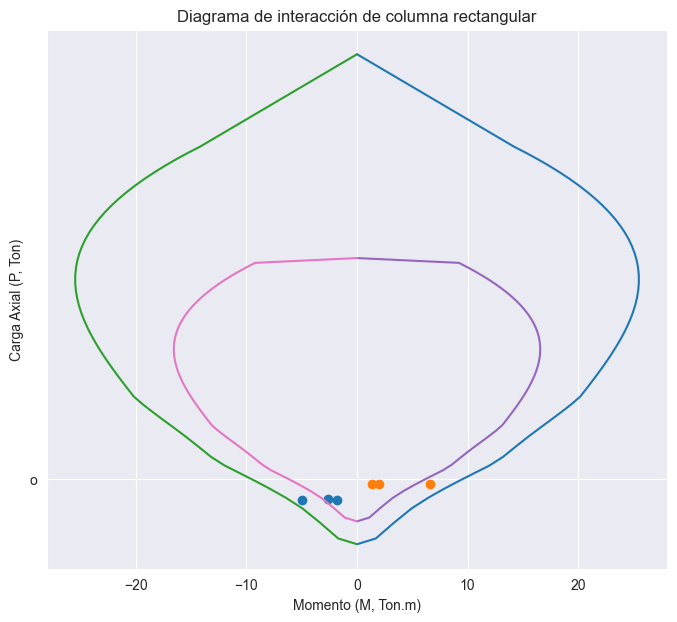

Programa finalizado


In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# PROGRAMA PARA DIBUJAR EL DIAGRAMA DE INTERACCIÓN DE UNA COLUMNA
# COLUMNAS RECTANGULARES DE CONCRETO ARMADO
print('CÓDIGO PARA DIBUJAR EL DIAGRAMA DE INTERACCIÓN DE COLUMNAS RECTANGULARES')
print('PONTIFICIA UNIVERSIDAD CATOLICA DEL ECUADOR')
print('Derechos: Nicolas Fernando Játiva Palma')

print('INGRESO DE DATOS')
fc=240   #Esfuerzo ultimo del concreto
fy=4200  #Esfuerzo de fluencia del acero longitudinal
b=40  #Base
h=50  #Altura
nc=4  #numero de capas de acero
rec=3 #recubrimiento
dv=1.8 #diametro de varilla longitudinal

Pb2=86.4
Mb2=972.255

Eu=0.003  #Deformacion unitaria ultima del concreto
Ey=0.0021 #Deformación unitaria de fluencia del acero
E=2040000  #Modulo de Elasticidad

if fc<=280:
    beta1=0.85
elif fc>280 and fc<562.4:
    beta1=0.85-(0.05*(fc-280)/(70.307))
else:
    beta1=0.65


di=np.zeros(np.int0(nc))
Ast=np.zeros(np.int0(nc))
ti=np.zeros(np.int0(nc))

for dd in range(nc):
    nv=float(input('Ingrese numero de varillas por capa: '))
    Asi=nv*(dv**2)*(np.pi/4)
    e= (h-(rec*2)-(nc*dv))/(nc-1)

    if dd==1:
        di[dd]= (rec+(dv/2))
    elif dd==nc:
        di[dd]= (h-(rec+(dv/2)))
    else:
        di[dd]= (di[dd-1]+e)

    Ast[dd]=Asi


#Obtención de valores Pn y Mn
print('Calculo de valores de Pn & Mn')

P0=((beta1*fc*((h*b)-sum(Ast)))+(sum(Ast)*fy))/1000
M0=0
e0=M0/P0

Pnmax=0.8*P0

#...........................

C=np.zeros(np.int0(h+1))
Esi=np.zeros(np.int0(nc))
fsi=np.zeros(np.int0(nc))
Mnst=np.zeros(np.int0(nc))
Mnsti=np.zeros(np.int0(h+1))
Fsi=np.zeros(np.int0(h+1))
ygac=np.zeros(np.int0(h+1))
Pn=np.zeros(np.int0(h+1))
Mn=np.zeros(np.int0(h+1))
Mnphi=np.zeros(np.int0(h+1))
Pnphi=np.zeros(np.int0(h+1))


for i in range(1,h+1):
    C[i]=i-1
    a=beta1*C[i]

    for u in range(1,nc):

        if di[u]>a:
            Es=Eu*((i-di[u])/i)
            fs=E*Es
            if np.abs(fs)<fy:
                fs=E*Es
            else:
                fs=fy*((np.abs(fs))/fs)
                Esi[u]=Es
                fsi[u]=fs*Ast[u]

        else:
            Es=Eu*((i-di[u])/i)
            fs=E*Es
        
            if np.abs(fs)<fy:
                fs=E*Es
            else:
                fs=fy*((np.abs(fs))/fs)
        
        Esi[u]=Es
        fsi[u]=(fs-(0.85*fc))*Ast[u]

    yg=h/2
    Mnst[u]=(fsi[u]*(yg-di[u]))/1000

    if Esi[u]<Ey:
        phi=0.65
    elif Esi[u]>Ey and Esi[u]<=(Eu+Ey):
        phi=0.65+(0.25*((Esi[u]-Ey)/Eu))
    elif Esi[u]>=(Eu+Ey):
        phi=0.9

    ygac[i]=h/2
    Mnsti[i]=np.sum(Mnst)
    Fsi[i]=np.sum(fsi)


    Pn[i]=(beta1*fc*(a*b)+Fsi[i])/1000
    Pnphi[i]=phi*Pn[i]
    Mn[i]=((0.5*(beta1*fc*(a*b)*(h-a)))+Mnsti[i])/100000
    Mnphi[i]=phi*Mn[i]
    eb=Mn/Pn

Pn=np.delete(Pn,0)
Pnphi=np.delete(Pnphi,0)
Mn=np.delete(Mn,0)
Mnphi=np.delete(Mnphi,0)

print('Valores de Pn son: ',Pn)
print('Valores de Pnphi son: ',Pnphi)
print('Valores de Mn son: ',Mn)
print('Valores de Mnphi son: ',Mnphi)

Pn1=np.append(Pn,[P0])
P1=np.append(-Pn,[P0])
Mn1=np.append(Mn,[M0])
M1=np.append(-Mn,[M0])

Pnphi1=np.append(Pnphi,[0.8*0.65*P0])
Pnphi2=np.append(-Pnphi,[0.8*0.65*P0])
Mnphi1=np.append(Mnphi,[0.8*0.65*M0])
Mnphi2=np.append(-Mnphi,[0.8*0.65*M0])
#FIN obtencion de valores Pn y Mn


#Importacion de datos dde excel
tbmommax=pd.read_excel(r'C:\Users\USUARIO\Documents\Nico\hormigon II\Momentomax1.xlsx', sheet_name='Hoja1')
tbmommin=pd.read_excel(r'C:\Users\USUARIO\Documents\Nico\hormigon II\momentomin.xlsx', sheet_name='Hoja1')
print('Momentos maximos de la columna: ',tbmommax)
print('Momentos minimos de la columna: ',tbmommin)
tbmx=pd.DataFrame(tbmommin)
tbmm=pd.DataFrame(tbmommax)
momax=tbmx.to_numpy()
momin=tbmm.to_numpy()
#FIN importacion


#Graficador
sns.set_style('darkgrid')
fig, ax=plt.subplots(figsize=(8,7))

ax.plot(Mn1, Pn1,'-','o')
ax.plot(M1, Pn1,'-','o')
ax.plot(Mnphi1, Pnphi1,'-','o')
ax.plot(Mnphi2, Pnphi1,'-','o')
ax.scatter(momax[:,0], momax[:,1])
ax.scatter(momin[:,0], momin[:,1])

ax.set_xlabel('Momento (M, Ton.m)')
ax.set_ylabel('Carga Axial (P, Ton)')
plt.title('Diagrama de interacción de columna rectangular')
plt.show()
print('Programa finalizado')
#Fin graficador
#Fin programa

'''
Importante considerar que unicamente aplica para columnas rectangulares
cuyo eje neutro sea paralelo a la base. Caso contrario debe modificarse el loop 
tomando un numero de iteraciones correspondiente a la longitud de la base.
'''


